In [6]:
import os

In [8]:
os.environ['LASER'] = %pwd + "/services/similarity/LASER"

In [10]:
import faiss 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from services.similarity.Encoders import LASEREncoder

ModuleNotFoundError: No module named 'text_processing'

In [106]:
encoder_path = os.environ['LASER']+"/models/bilstm.93langs.2018-12-26.pt"
# bpe_codes = os.environ['LASER']+"/models/bilstm.93langs.2018-12-26.pt"
enc = LASEREncoder(encoder_path)

LASER


In [107]:
raw_sents = [
    "I have to learn for the exams!",
    "¡Tengo que aprender para los exámenes!",
    "我必須準備考試",
    "Ich muss auf die Prüfungen lernen!",
    "Sınavlara katılmak zorundayım!",
    "Le mystère du chat vert",
    "Warum ist der Himmel blau",
    "I have the best words",
]

In [108]:
sents = []
for raw_sent in raw_sents:
    sents.append(enc.encode_sentence(raw_sent))

sents = np.array(sents)

In [109]:
sents.shape

(11, 1024)

In [111]:
d = 1024                           # dimension

In [112]:
                  # make faiss available
index = faiss.IndexFlatL2(d)   # build the index
print(index.is_trained)

True


In [113]:
index.add(sents)                  # add vectors to the index
print(index.ntotal)

11


In [114]:
search = np.array([sents[0]])

In [115]:
search.shape

(1, 1024)

In [116]:
k = 11                          # we want to see 4 nearest neighbors
D, I = index.search(search, k) # sanity check
print(D)
print(I)

[[0.         0.02943888 0.03294155 0.03881075 0.04818174 0.04818174
  0.07962251 0.10053311 0.11644123 0.12393126 0.22997043]]
[[ 0  4  2  1  7  5  6  3  8  9 10]]


In [117]:
for ind, i in enumerate(I[0]):
    print(raw_sents[i] + " - " + str(D[0][ind]))

Hello world - 0.0
Ciao mondo - 0.029438883
Bonjour monde - 0.03294155
Hallo wereld - 0.038810752
Hola mundo - 0.04818174
Olá mundo - 0.04818174
Здравствуй, мир - 0.07962251
γειά σου κόσμος - 0.100533105
Le mystère du chat vert - 0.11644123
Warum ist der Himmel blau - 0.12393126
I have the best words - 0.22997043


In [128]:
from sklearn.manifold import TSNE
X = sents
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape
y = raw_sents

In [139]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), fontdict={'weight': 'bold', 'size': 9})

    
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

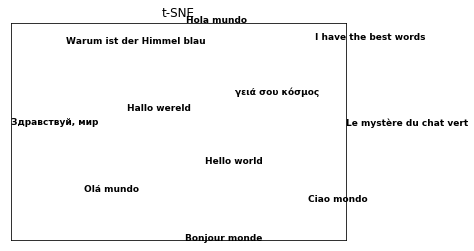

In [140]:
plot_embedding(X_embedded, y, "t-SNE")